## Spreadsheet Analysis

Step 1: Understand your data?

- Data format?
- Missing data?
- Outliers?

Step 2: What is my aim?

- Discover drivers of Churn?
- Why do we care about the Churn?

Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)

- Higher monthly charges leads to higher churn?
- Non-senior citizens churn at higher rate
- More the services, less the churn?

Exploratory question:

- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Updated_CustDetailsSpreadsheet.csv')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,calculated_monthly_charge,Validate,Phone_Service_Type,Internet,Contract_type,Rounded_tenure,Service_Type
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,...,True,True,3,65.6,NaN,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,...,True,True,0,59.9,NaN,Two or More Lines,DSL,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,...,True,True,0,73.9,NaN,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,...,True,True,1,98,NaN,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,...,True,True,1,83.9,NaN,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone


In [3]:
df.shape

(7050, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7049 non-null   object 
 1   gender                     7049 non-null   object 
 2   is_senior_citizen          7049 non-null   float64
 3   partner                    7049 non-null   object 
 4   dependents                 7049 non-null   object 
 5   phone_service              7049 non-null   float64
 6   internet_service           7049 non-null   float64
 7   contract_type              7049 non-null   float64
 8   payment_type               7049 non-null   object 
 9   monthly_charges            7049 non-null   float64
 10  total_charges              7038 non-null   float64
 11  churn                      7049 non-null   object 
 12  tenure                     7049 non-null   float64
 13  is_female                  7049 non-null   objec

In [5]:
df['internet_service'] = df.internet_service.replace([0,1,2], ['No_internet', 'DSL', 'Fiber'])

In [6]:
df.internet_service.value_counts()

Fiber          3098
DSL            2422
No_internet    1529
Name: internet_service, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7049 non-null   object 
 1   gender                     7049 non-null   object 
 2   is_senior_citizen          7049 non-null   float64
 3   partner                    7049 non-null   object 
 4   dependents                 7049 non-null   object 
 5   phone_service              7049 non-null   float64
 6   internet_service           7049 non-null   object 
 7   contract_type              7049 non-null   float64
 8   payment_type               7049 non-null   object 
 9   monthly_charges            7049 non-null   float64
 10  total_charges              7038 non-null   float64
 11  churn                      7049 non-null   object 
 12  tenure                     7049 non-null   float64
 13  is_female                  7049 non-null   objec

In [8]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,calculated_monthly_charge,Validate,Phone_Service_Type,Internet,Contract_type,Rounded_tenure,Service_Type
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,DSL,1.0,Mailed check,65.6,...,True,True,3,65.6,NaN,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0.0,No,No,2.0,DSL,0.0,Mailed check,59.9,...,True,True,0,59.9,NaN,Two or More Lines,DSL,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0.0,No,No,1.0,Fiber,0.0,Electronic check,73.9,...,True,True,0,73.9,NaN,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1.0,Yes,No,1.0,Fiber,0.0,Electronic check,98.0,...,True,True,1,98,NaN,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,Fiber,0.0,Mailed check,83.9,...,True,True,1,83.9,NaN,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone


In [9]:
# What datatype is your target variable? Churn = Categorical
# Numeric continuous variables: monthly_charges, total_charges, tenure
# Categorical Variables: is_senior_citizen, gender, partner, *service types, * payment types

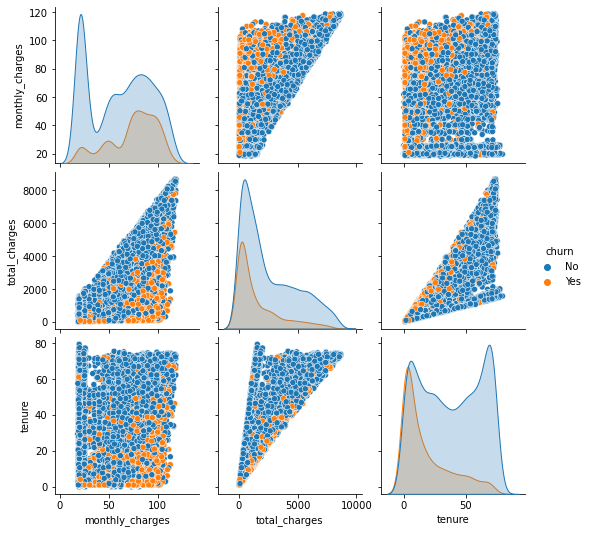

In [10]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [11]:
# mean monthly charges for customers who churn vs who don't churn

df.groupby('churn').monthly_charges.mean()

churn
No     61.255136
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

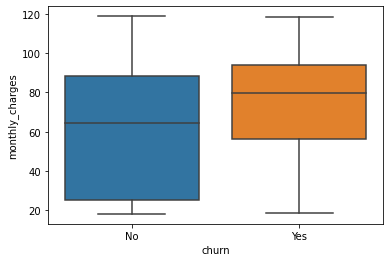

In [12]:
sns.boxplot(data = df, y = 'monthly_charges', x = 'churn')

In [13]:
# Categorical vs Categorical

pd.crosstab(df.gender, df.churn, normalize='index')

churn,No,Yes
gender,,
Female,0.730736,0.269264
Male,0.738617,0.261383


## Potential Drivers of Churn: Exploration

### Contract Type

In [14]:
pd.crosstab(df.contract_type, df.churn)

churn,No,Yes
contract_type,,
0.0,2220,1656
1.0,1310,166
2.0,1649,48


In [15]:
ctab_contract_type = pd.crosstab(df.contract_type, df.churn, normalize='index')
ctab_contract_type

churn,No,Yes
contract_type,,
0.0,0.572755,0.427245
1.0,0.887534,0.112466
2.0,0.971715,0.028285


<AxesSubplot:xlabel='contract_type'>

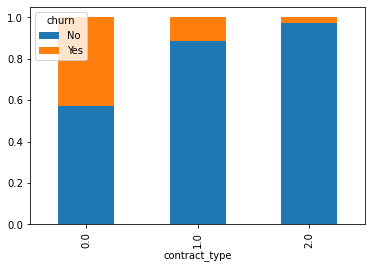

In [16]:
ctab_contract_type.plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='contract_type'>

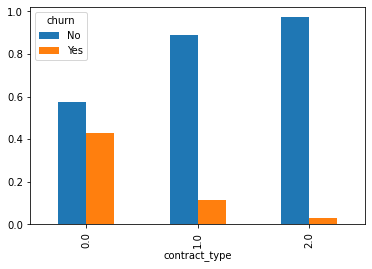

In [17]:
ctab_contract_type.plot(kind = 'bar')
## PROMISING indicator

### Senior Citizen

In [18]:
pd.crosstab(df.is_senior_citizen, df.churn)

churn,No,Yes
is_senior_citizen,,
0.0,4513,1394
1.0,666,476


In [19]:
ctab_senior = pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')
ctab_senior

churn,No,Yes
is_senior_citizen,,
0.0,0.764009,0.235991
1.0,0.583187,0.416813


<AxesSubplot:xlabel='is_senior_citizen'>

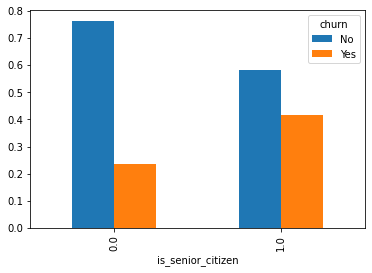

In [20]:
ctab_senior.plot(kind = 'bar')
## POSSIBLE indicator

In [21]:
# churn rate vs tenure (line chart)
# is this rate different for different categories?? (contract type, service type)


### Internet Service

In [22]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.255136
Yes    74.417834
Name: monthly_charges, dtype: float64

In [23]:
df.groupby('churn').internet_service.value_counts()

churn  internet_service
No     DSL                 1962
       Fiber               1801
       No_internet         1416
Yes    Fiber               1297
       DSL                  460
       No_internet          113
Name: internet_service, dtype: int64

In [24]:
pd.crosstab(df.internet_service, df.churn)

churn,No,Yes
internet_service,,
DSL,1962,460
Fiber,1801,1297
No_internet,1416,113


In [25]:
ctab_internet_service = pd.crosstab(df.internet_service, df.churn, normalize = 'index')
ctab_internet_service

churn,No,Yes
internet_service,,
DSL,0.810074,0.189926
Fiber,0.581343,0.418657
No_internet,0.926095,0.073905


<AxesSubplot:xlabel='internet_service'>

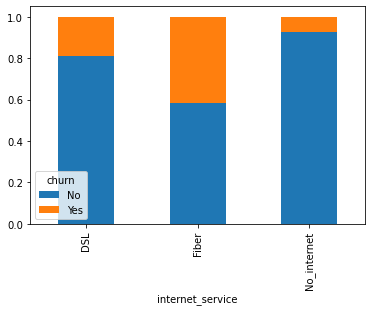

In [26]:
ctab_internet_service.plot(kind = 'bar', stacked = True)
## NOT a good indicator

### Service Type

In [27]:
pd.crosstab(df.Service_Type, df.churn)

churn,No,Yes
Service_Type,,
Internet Only,512,171
Internet+Phone,3251,1586
Phone Only,1416,113


In [28]:
ctab_service_type = pd.crosstab(df.Service_Type, df.churn, normalize='index')
ctab_service_type

churn,No,Yes
Service_Type,,
Internet Only,0.749634,0.250366
Internet+Phone,0.672111,0.327889
Phone Only,0.926095,0.073905


<AxesSubplot:xlabel='Service_Type'>

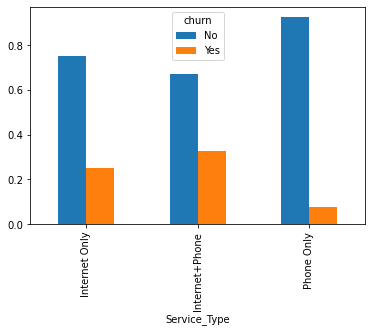

In [29]:
ctab_service_type.plot(kind = 'bar')
## NOT a good indicator

### Partner, dependants, Partner&Dependents Exploration

In [30]:
pd.crosstab(df.dependents, df.churn)

churn,No,Yes
dependents,,
No,3391,1543
Yes,1788,327


In [31]:
ctab_dependents = pd.crosstab(df.dependents, df.churn, normalize = 'index')
ctab_dependents

churn,No,Yes
dependents,,
No,0.687272,0.312728
Yes,0.845390,0.154610


<AxesSubplot:xlabel='dependents'>

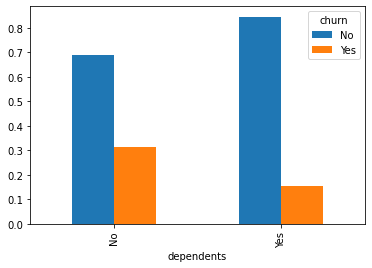

In [32]:
ctab_dependents.plot(kind='bar')
## POSSIBLE indicator (combine with partner)

In [33]:
pd.crosstab(df.partner, df.churn)

churn,No,Yes
partner,,
No,2442,1200
Yes,2737,670


In [34]:
ctab_partner = pd.crosstab(df.partner, df.churn, normalize = 'index')
ctab_partner

churn,No,Yes
partner,,
No,0.670511,0.329489
Yes,0.803346,0.196654


<AxesSubplot:xlabel='partner'>

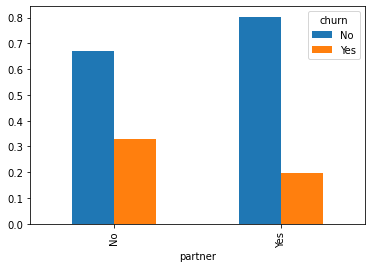

In [35]:
ctab_partner.plot(kind = 'bar')
## PROMISING indicator (combine with dependents)

In [36]:
pd.crosstab(df.partner_dependants, df.churn)

churn,No,Yes
partner_dependants,,
0,2158,1123
1,1233,420
2,284,77
3,1504,250


In [37]:
ctab_partner_dependents = pd.crosstab(df.partner_dependants, df.churn, normalize='index')
ctab_partner_dependents

churn,No,Yes
partner_dependants,,
0,0.657726,0.342274
1,0.745917,0.254083
2,0.786704,0.213296
3,0.857469,0.142531


<AxesSubplot:xlabel='partner_dependants'>

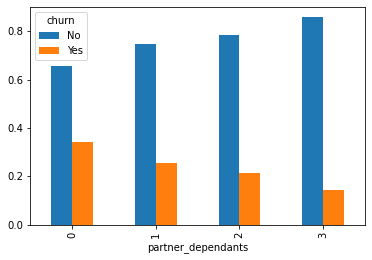

In [38]:
ctab_partner_dependents.plot(kind='bar')
## PROMISING indicator

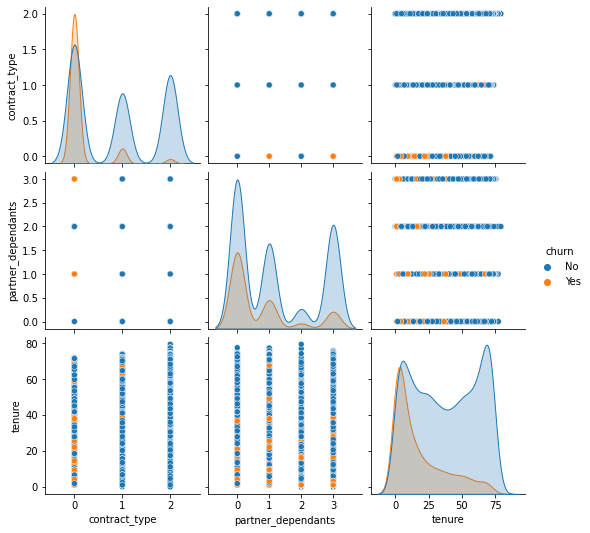

In [39]:
sns.pairplot(df[['contract_type', 'partner_dependants', 'tenure', 'churn']], hue = 'churn')

### Deeper exploration of Partner/Dependents relationship to Churn: as "Family Type"

In [44]:
df_family_type = df.rename(columns={'partner_dependants': 'family_type'})

In [45]:
ctab_family_type = pd.crosstab(df.partner_dependants, df.churn, normalize = 'index')
ctab_family_type

churn,No,Yes
partner_dependants,,
0,0.657726,0.342274
1,0.745917,0.254083
2,0.786704,0.213296
3,0.857469,0.142531


NameError: name 'ctab_partner_dependants' is not defined

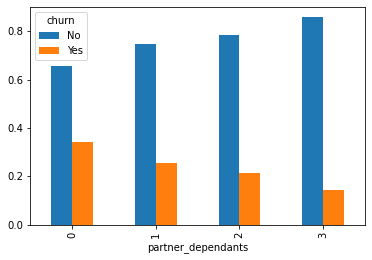

In [46]:
ctab_family_type.plot(kind='bar')
viol_plot = ctab_partner_dependants.plot(kind='bar')

viol_plot.set_xlabel('Family Type')
viol_plot.set_ylabel('Churn Rate')
viol_plot.set_title('Churn Rate by Family Type')
viol_plot.set_xticklabels( ('Single', 'partner','dependent', 'both') )
plt.rcParams["figure.figsize"] = (10,8)


In [47]:
df.tenure.max()

79.3

### Phone Service

In [48]:
pd.crosstab(df.phone_service, df.churn, normalize = 'index')
## NOT a good indicator

churn,No,Yes
phone_service,,
0.0,0.749634,0.250366
1.0,0.749926,0.250074
2.0,0.713901,0.286099


In [49]:
pd.crosstab(df.payment_type, df.churn)

churn,No,Yes
payment_type,,
Bank transfer (automatic),1289,259
Credit card (automatic),1292,232
Electronic check,1294,1071
Mailed check,1304,308


In [50]:
ctab_payment_type = pd.crosstab(df.payment_type, df.churn, normalize = 'index')
ctab_payment_type

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.832687,0.167313
Credit card (automatic),0.847769,0.152231
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


<AxesSubplot:xlabel='payment_type'>

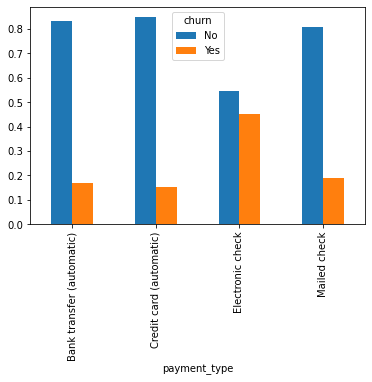

In [51]:
ctab_payment_type.plot(kind='bar')

In [52]:
pd.crosstab(df.Internet, df.churn)

churn,No,Yes
Internet,,
DSL,1962,460
Fiber Optic,1801,1297
No Internet Service,1416,113


In [53]:
df.churn.value_counts('Yes')

No     0.734714
Yes    0.265286
Name: churn, dtype: float64

## Hypothesis: Contract type

In [54]:
pd.crosstab(df.contract_type, df.churn)

churn,No,Yes
contract_type,,
0.0,2220,1656
1.0,1310,166
2.0,1649,48


In [55]:
ctab_contract_type = pd.crosstab(df.contract_type, df.churn, normalize='index')
ctab_contract_type

churn,No,Yes
contract_type,,
0.0,0.572755,0.427245
1.0,0.887534,0.112466
2.0,0.971715,0.028285


<AxesSubplot:xlabel='contract_type'>

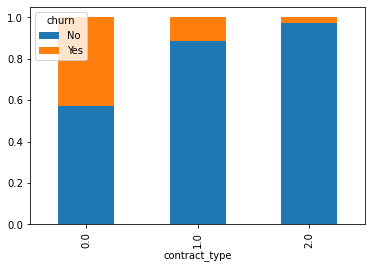

In [56]:
ctab_contract_type.plot(kind = 'bar', stacked = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7049 non-null   object 
 1   gender                     7049 non-null   object 
 2   is_senior_citizen          7049 non-null   float64
 3   partner                    7049 non-null   object 
 4   dependents                 7049 non-null   object 
 5   phone_service              7049 non-null   float64
 6   internet_service           7049 non-null   object 
 7   contract_type              7049 non-null   float64
 8   payment_type               7049 non-null   object 
 9   monthly_charges            7049 non-null   float64
 10  total_charges              7038 non-null   float64
 11  churn                      7049 non-null   object 
 12  tenure                     7049 non-null   float64
 13  is_female                  7049 non-null   objec

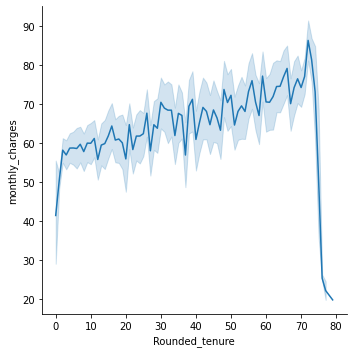

In [58]:
sns.relplot(data = df, x = 'Rounded_tenure', y = 'monthly_charges', kind = 'line')



In [59]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,calculated_monthly_charge,Validate,Phone_Service_Type,Internet,Contract_type,Rounded_tenure,Service_Type
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,DSL,1.0,Mailed check,65.6,...,True,True,3,65.6,NaN,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0.0,No,No,2.0,DSL,0.0,Mailed check,59.9,...,True,True,0,59.9,NaN,Two or More Lines,DSL,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0.0,No,No,1.0,Fiber,0.0,Electronic check,73.9,...,True,True,0,73.9,NaN,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1.0,Yes,No,1.0,Fiber,0.0,Electronic check,98.0,...,True,True,1,98,NaN,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,Fiber,0.0,Mailed check,83.9,...,True,True,1,83.9,NaN,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone


In [60]:
df.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [61]:
df.loc[df.contract_type == '0', 'churn'] = "No"

In [ ]:
df[['contract_type','partner_dependants','churn']]

## df.churn.value_counts()

In [ ]:
sns.relplot(data = df, x = 'Rounded_tenure', y = 'monthly_charges', hue = 'churn', kind = 'line')



In [ ]:
ctab_family_type.plot(kind='bar')
viol_plot = ctab_partner_dependants.plot(kind='bar')

viol_plot.set_xlabel('Family Type')
viol_plot.set_ylabel('Churn Rate')
viol_plot.set_title('Churn Rate by Family Type')
viol_plot.set_xticklabels( ('Single', 'partner','dependent', 'both') )
plt.rcParams["figure.figsize"] = (10,8)



In [ ]:
df.loc[df.contract_type == 0, 'churn'] = "No"
df.alt_churn = df.loc[df.contract_type == 0, 'churn'] = "No"
df[['contract_type','partner_dependants','churn']]

In [ ]:
ctab_contract_type.plot(kind = 'bar', stacked = True)

In [ ]:
pd.crosstab(df.churn, df.monthly_charges.sum())

In [ ]:
for charges in [df.total_charges]:
    if df.churn == "Yes":
        return df.total_charges.sum()


In [67]:
df.head(20)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependants,calculated_monthly_charge,Validate,Phone_Service_Type,Internet,Contract_type,Rounded_tenure,Service_Type
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,DSL,1.0,Mailed check,65.60,...,True,True,3,65.6,NaN,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0.0,No,No,2.0,DSL,0.0,Mailed check,59.90,...,True,True,0,59.9,NaN,Two or More Lines,DSL,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0.0,No,No,1.0,Fiber,0.0,Electronic check,73.90,...,True,True,0,73.9,NaN,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1.0,Yes,No,1.0,Fiber,0.0,Electronic check,98.00,...,True,True,1,98,NaN,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,Fiber,0.0,Mailed check,83.90,...,True,True,1,83.9,NaN,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone
5,0013-MHZWF,Female,0.0,No,Yes,1.0,DSL,0.0,Credit card (automatic),69.40,...,True,True,2,69.4,NaN,One Line,DSL,Month-to-Month,8.0,Internet+Phone
6,0013-SMEOE,Female,1.0,Yes,No,1.0,Fiber,2.0,Bank transfer (automatic),109.70,...,True,True,1,109.7,NaN,One Line,Fiber Optic,2 Year,72.0,Internet+Phone
7,0014-BMAQU,Male,0.0,Yes,No,2.0,Fiber,2.0,Credit card (automatic),84.65,...,True,True,1,84.65,NaN,Two or More Lines,Fiber Optic,2 Year,64.0,Internet+Phone
8,0015-UOCOJ,Female,1.0,No,No,1.0,DSL,0.0,Electronic check,48.20,...,True,True,0,48.2,NaN,One Line,DSL,Month-to-Month,7.0,Internet+Phone
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,DSL,2.0,Mailed check,90.45,...,True,True,3,90.45,NaN,Two or More Lines,DSL,2 Year,66.0,Internet+Phone


In [63]:
df.groupby('churn').total_charges.sum()

churn
No     13205105.45
Yes     2862957.40
Name: total_charges, dtype: float64

In [64]:
df.groupby('churn').monthly_charges.sum()

churn
No     317240.35
Yes    139161.35
Name: monthly_charges, dtype: float64

In [65]:
df.monthly_charges.sum()

456401.7

In [68]:
df.groupby('contract_type').monthly_charges.sum()

contract_type
0.0    257324.65
1.0     96031.10
2.0    103045.95
Name: monthly_charges, dtype: float64

In [70]:
df.groupby('contract_type').total_charges.sum()

contract_type
0.0    5305892.00
1.0    4476429.65
2.0    6285741.20
Name: total_charges, dtype: float64

In [71]:
4476429+6285741

10762170

In [72]:
df.total_charges.sum()

16068062.85

In [74]:
df.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64